# Ciencia de Datos en Python
## Proyecto #1

## 1. Creación de entorno virtual en Anaconda 

In [1]:
# conda create --regression_1 python=3.8 numpy pandas matplotlib seaborn scikit-learn
# conda activate regression_1

## 2. Carga de librerias 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## 3. Carga de Data

In [2]:
# Carga de  datos
data = np.load('proyecto_training_data.npy')

# separacion de los datos.
split_index = int(len(data) * 0.8)

# Division del dataset para 'entrenamiento y validación'
train_data = data[:split_index]
test_data = data[split_index:]

# Verificación de las subdimensiones para corroborar los conjuntos de datos
print(f'Dataset completo: {data.shape}')
print(f'Set de entrenamiento: {train_data.shape}')
print(f'Set de validación: {test_data.shape}')

Dataset completo: (1460, 6)
Set de entrenamiento: (1168, 6)
Set de validación: (292, 6)


## 4. Análisis exploratorio de datos

In [3]:
# Asignación de nombres a las variables
column_names = ['sales_price', 'overall_qual', 'floor_sqr_feet', 'tot_rooms', 'year_built', 'lot_frontage']

# Conversión de datos 'entrenamiento' en un DataFrame y asignación de nombres a las variables
train_df = pd.DataFrame(data, columns = column_names)
test_df = pd.DataFrame(test_data, columns = column_names)

# Calculo de estadísticas descriptivas para cada variable
descriptive_stats = train_df.describe()

# Calcular el rango (peak-to-peak) para cada variable
ranges = train_df.max() - train_df.min()

# Agregar el rango al DataFrame de estadísticas descriptivas
descriptive_stats.loc['range'] = ranges

### 4.1 Cuadros descriptivos

In [4]:
train_df.head()

,sales_price,overall_qual,floor_sqr_feet,tot_rooms,year_built,lot_frontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [5]:
descriptive_stats

,sales_price,overall_qual,floor_sqr_feet,tot_rooms,year_built,lot_frontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


### 4.2 Histogramas

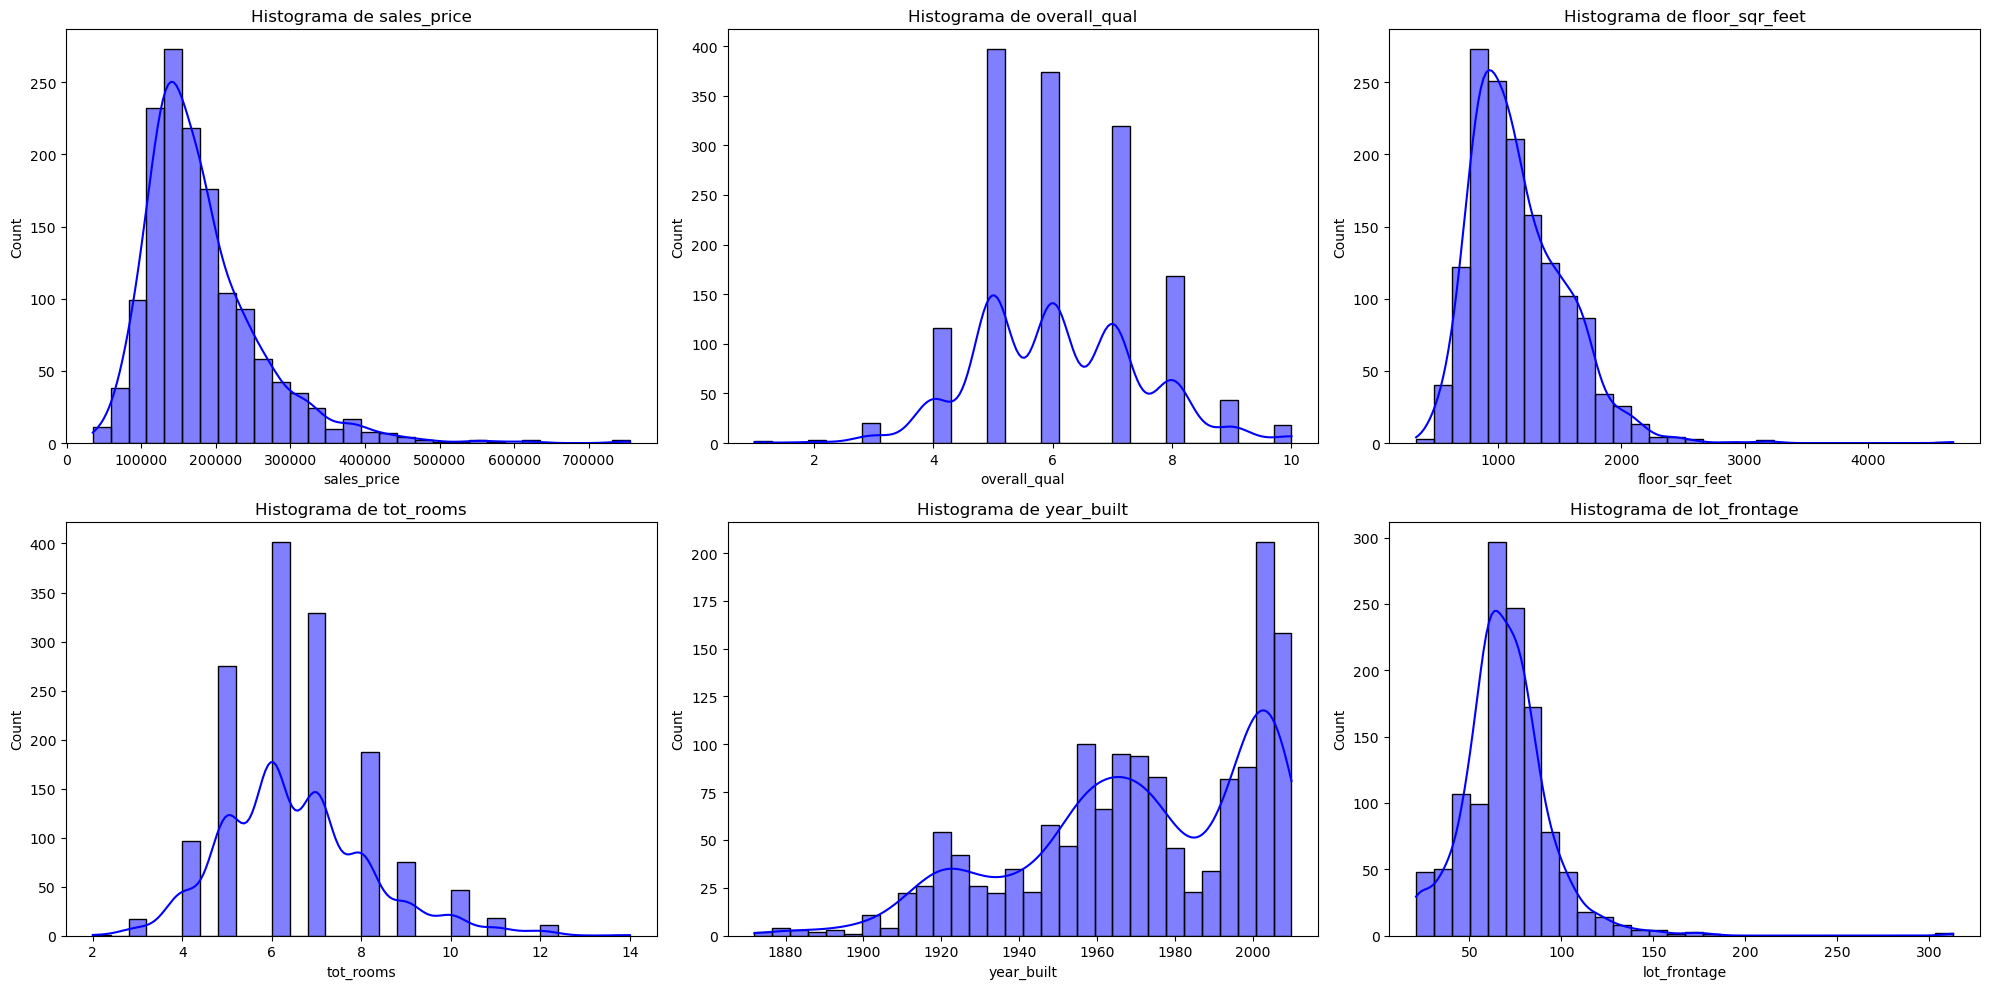

In [7]:
# Configuración para mejorar la visualización
plt.figure(figsize=(20, 10))

# Graficar histogramas para cada variable
for i, column in enumerate(train_df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column].dropna(), kde=True, color = 'blue',
                 bins=30)  # Eliminacion de NAs para vizualizacion
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

- ***sales_price (precio de venta):*** Este histograma representará la distribución de los precios de venta de las propiedades. Es probable que veamos una distribución sesgada hacia la derecha, donde la mayoría de las propiedades tienen precios más bajos con algunas excepciones de propiedades con precios mucho más altos. Este patrón es común en datos de precios de propiedades debido a la presencia de propiedades de lujo o de características excepcionales.

- ***overall_qual(calificación general):*** Dado que esta variable califica la calidad general del material y el acabado de la casa en una escala ordinal (1 a 10), el histograma podría mostrar una distribución donde ciertas calidades son más comunes que otras. Podríamos esperar ver picos en calificaciones específicas que son típicamente más prevalentes en el mercado, como calidades medias a altas.

- ***floor_sqr_feet (pies cuadrados del primer piso):*** Este histograma mostrará cómo se distribuyen los tamaños de los primeros pisos de las propiedades. Es probable que veamos una distribución con un sesgo hacia la derecha, reflejando que hay más casas con áreas de piso menores, con una disminución gradual en el número de casas a medida que aumenta el área de piso.

- ***tot_rooms (total de habitaciones sobre rasante, excluyendo baños):*** Esta variable puede mostrar una distribución que refleje el diseño típico de viviendas en el área de estudio. Es probable que exista un rango común de número de habitaciones que refleje el diseño estándar de las casas, con menos casas teniendo un número muy bajo o muy alto de habitaciones.

- ***year_built (año de construcción):*** El histograma para el año de construcción podría revelar tendencias en la construcción de viviendas a lo largo del tiempo. Por ejemplo, podríamos ver picos que corresponden a periodos de auge de la construcción. La distribución también podría mostrar cómo las casas más antiguas se comparan en número con las más nuevas en el dataset.

- ***lot_frontage (pies lineales de calle conectados a la propiedad):*** Esta variable podría tener una distribución que muestre la mayoría de las propiedades con un frente de lote estándar, con algunas propiedades teniendo frentes de lote excepcionalmente largos o cortos. Similar a otras variables continuas relacionadas con el tamaño de la propiedad, podríamos esperar un sesgo hacia la derecha, con la mayoría de las propiedades teniendo frentes de lote más cortos.


### 4.3 Correlación

In [8]:
correlation_coeffs = {}
for var in column_names[1:]:  # Ignorar 'sales_price' para el loop, ya que es la variable Y
    x = train_df[var].dropna()
    y = train_df['sales_price'].dropna()
    common_indices = y.index.intersection(x.index)
    corr_coeff = np.corrcoef(x.loc[common_indices], y.loc[common_indices])[0, 1]
    correlation_coeffs[var] = corr_coeff

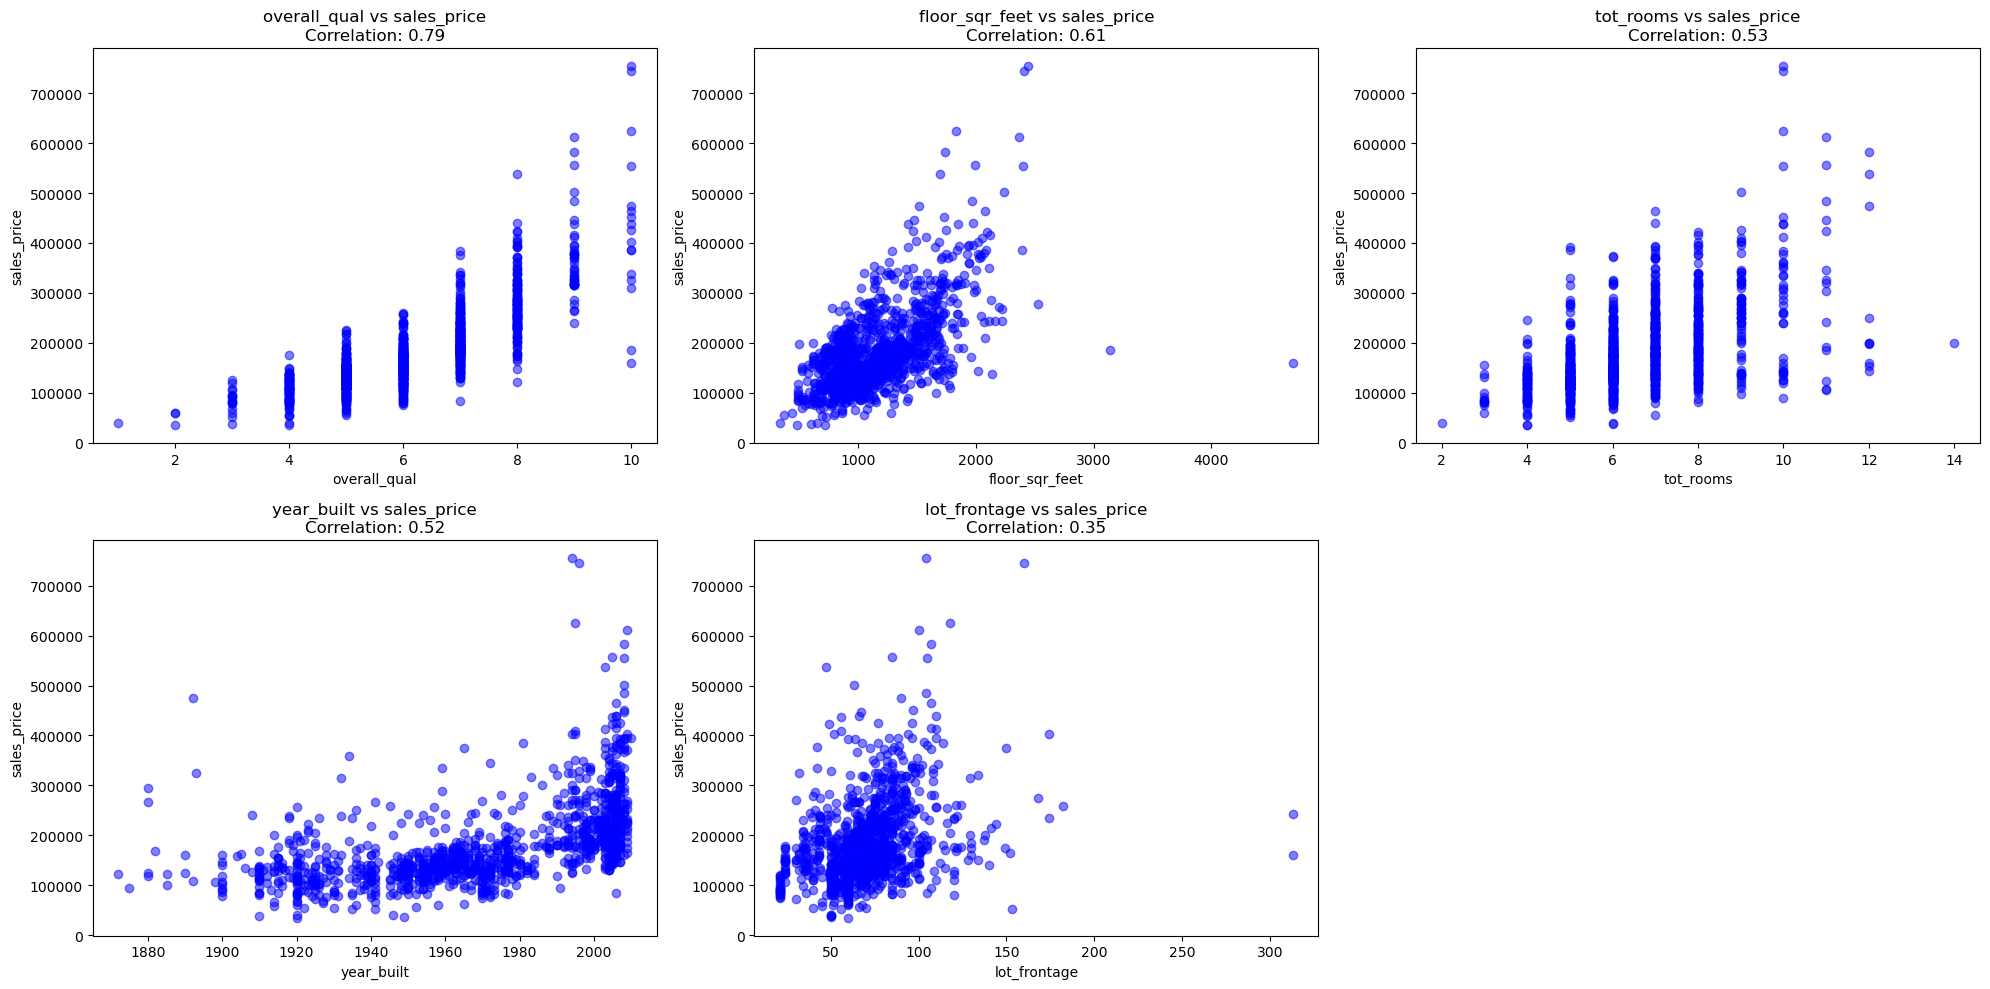

In [9]:
plt.figure(figsize=(20, 10))
for i, (var, corr_coeff) in enumerate(correlation_coeffs.items(), 1):
    plt.subplot(2, 3, i)
    x = train_df[var].loc[common_indices]  # Usar los mismos índices comunes
    y = train_df['sales_price'].loc[common_indices]
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title(f'{var} vs sales_price\nCorrelation: {corr_coeff:.2f}')
    plt.xlabel(var)
    plt.ylabel('sales_price')
plt.tight_layout()
plt.show()

### 4.4. Selección de variables 

In [10]:
variables_sorted_by_corr = sorted(correlation_coeffs, key=correlation_coeffs.get, reverse=True)[:2]
print(f'Las variables con más potencial predictivo son: {variables_sorted_by_corr[0]} y {variables_sorted_by_corr[1]} con coeficientes de correlación de {correlation_coeffs[variables_sorted_by_corr[0]]:.2f} y {correlation_coeffs[variables_sorted_by_corr[1]]:.2f}, respectivamente.')


Las variables con más potencial predictivo son: overall_qual y floor_sqr_feet con coeficientes de correlación de 0.79 y 0.61, respectivamente.


## 5. Entrenamiento de Modelo de Regresión

In [11]:
class uni_regression:
    def __init__(self):
        self.beta = np.zeros(2)                       # betas "zero seed"
    
    def train(self, x, y, epochs, print_error_every, alpha):
        X = np.vstack([np.ones(len(x)), x]).T         # X matrix w/ 1s
        self.error_history = []                       # vector guardar el historial de errores
        self.model_history = []                       # vector guardar el historial de parametros betas

        for epoch in range(epochs):
            y_pred = X.dot(self.beta)                 # Matrix X (producto punto) vector parametros betas
            error = np.mean((y - y_pred) ** 2) / 2    # Error cuadrático medio
            self.error_history.append(error)
            
            gradient = X.T.dot(y_pred - y) / len(x)   # Gradiente del error con respecto a cada parámetro beta
            self.beta -= alpha * gradient
            self.model_history.append(self.beta.copy())
            
            if epoch % print_error_every == 0:
                print(f'Epoch {epoch}, Error: {error}')
                
    def predict(self, x):
        X = np.vstack([np.ones(len(x)), x]).T
        return X.dot(self.beta)
    
    def plot_error_history(self):
        plt.plot(self.error_history)
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error History')
        plt.show()

    def plot_model_evolution(self, x, y, n):
        plt.scatter(x, y, color='blue', alpha=0.5)
        for i in range(0, len(self.model_history), n):
            y_pred = self.model_history[i][1] * x + self.model_history[i][0]
            plt.plot(x, y_pred, label = f'Epoch {i+1}')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Model Evolution')
        plt.show()

Epoch 0, Error: 0.49999999999999983
Epoch 100, Error: 0.2290863723321124
Epoch 200, Error: 0.19278945258257796
Epoch 300, Error: 0.18792640307618977
Epoch 400, Error: 0.18727485328450574
Epoch 500, Error: 0.18718755885526214
Epoch 600, Error: 0.18717586317601514
Epoch 700, Error: 0.1871742961927124
Epoch 800, Error: 0.187174086248799
Epoch 900, Error: 0.18717405812058174


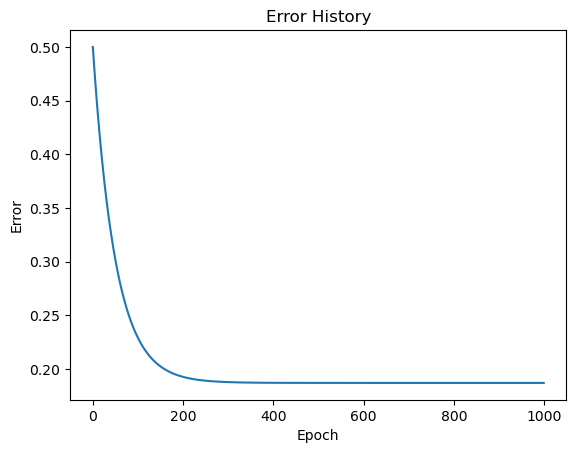

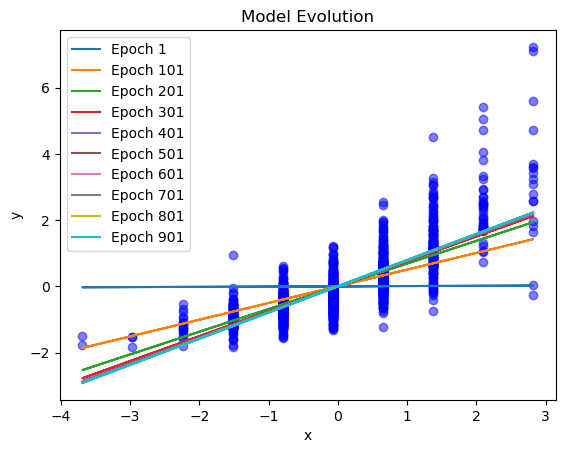

In [36]:
# column_names = ['sales_price', 'overall_qual', 'floor_sqr_feet', 'tot_rooms', 'year_built', 'lot_frontage']

def normalize(x):
    """Normaliza una característica usando Z-score."""
    return (x - np.mean(x)) / np.std(x)

# Normalización de la variable independiente y la variable dependiente
x_n = normalize(train_df['overall_qual'].values)
y_n = normalize(train_df['sales_price'].values)

# Instanciar y entrenar el modelo
model = uni_regression()
model.train(x, y, epochs = 1000, print_error_every = 100, alpha = 0.01)

model.plot_error_history()  # Visualizar el historial de error
model.plot_model_evolution(x, y, 100)

## 6. Entrenamiento con scikit-learn

In [19]:
variables_models = {
    'overall_qual': model_sklearn_overall_qual,
    'floor_sqr_feet': model_sklearn_floor_sqr_feet
}

In [21]:


# Asumiendo que train_df y test_df están correctamente definidos y contienen los datos de entrenamiento y validación
x_train_overall_qual = train_df['overall_qual'].values.reshape(-1, 1)
y_train = train_df['sales_price'].values
model_sklearn_overall_qual = LinearRegression().fit(x_train_overall_qual, y_train)

x_train_floor_sqr_feet = train_df['floor_sqr_feet'].values.reshape(-1, 1)
model_sklearn_floor_sqr_feet = LinearRegression().fit(x_train_floor_sqr_feet, y_train)

for var, model_sklearn in variables_models.items():
    x_valid = normalize(test_df['overall_qual'].values)
    y_valid = test_df['sales_price'].values

    # Asumiendo que tenemos una instancia de uni_regression entrenada para cada variable
    model_manual = uni_regression()  # Aquí deberías usar el modelo manual entrenado específico para 'var'
    # model_manual.train(...)  # El modelo ya debería estar entrenado

    pred_manual, pred_sklearn, pred_combined = combine_predictions(x_valid, model_manual, model_sklearn)

    mse_manual = mean_squared_error(y_valid, pred_manual)
    mse_sklearn = mean_squared_error(y_valid, pred_sklearn)
    mse_combined = mean_squared_error(y_valid, pred_combined)

    errors['manual'].append(mse_manual)
    errors['sklearn'].append(mse_sklearn)
    errors['variable'].append(var)


NameError: name 'combine_predictions' is not defined

In [ ]:
variables_models = {
    'overall_qual': model_sklearn_overall_qual,
    'floor_sqr_feet': model_sklearn_floor_sqr_feet
}

In [ ]:
# Graficar errores
plt.figure(figsize=(10, 5))
x = range(len(variables))
plt.bar(x, errors['manual'], width=0.4, label='Manual', align='center')
plt.bar(x, errors['sklearn'], width=0.4, label='Scikit-learn', align='edge')
plt.xticks(x, errors['variable'])
plt.ylabel('MSE')
plt.title('Comparación de MSE por Variable y Modelo')
plt.legend()
plt.show()